In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

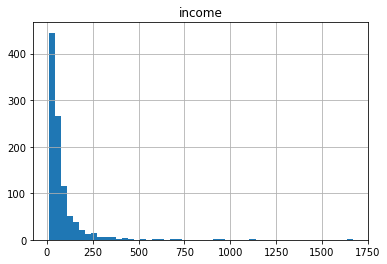

In [4]:
df.hist(column = 'income',bins = 50)

### Feature set

In [5]:
df.columns 

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [15]:
X = df.iloc[:,:11]
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [14]:
y = df['custcat']

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification - K nearest neighbor(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
k = 4
#Train model and predict
neigh = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

In [21]:
yhat = neigh.predict(x_test)
yhat

array([3, 1, 3, 4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 3,
       4, 2, 1, 3, 1, 4, 1, 4, 2, 4, 4, 2, 1, 2, 3, 4, 1, 1, 1, 4, 3, 2,
       3, 1, 4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 3,
       1, 2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 4, 3, 1, 1, 1, 1, 3, 4,
       1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 4, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       1, 1, 2, 4, 3, 1, 1, 2, 2, 1, 1, 1, 2, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 1, 1, 4, 1, 2, 1, 3, 2, 3,
       3, 4, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 4, 1, 2, 3, 3, 3, 4, 3,
       4, 1, 4, 4, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 2,
       2, 3], dtype=int64)

### Accuracy evaluation

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5575
Test set Accuracy:  0.26


### What about other K?

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.33 , 0.32 ])

### Plot the model accuracy for a different number of neighbors.


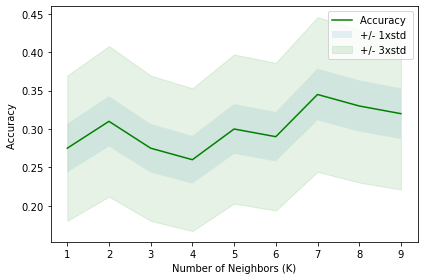

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7
